# Step 1: Check Nominal Parameters

In [3]:
from ENDFtk.tree import Tape
import numpy as np
import glob
import matplotlib.pyplot as plt

# tape = Tape.from_file('/home/sole-pie01/ndlib/jendl33/U238_jendl.txt')
# tape = Tape.from_file('/home/sole-pie01/ndlib/jeff-40/90-Th-232g.txt')
# tape = Tape.from_file('/home/sole-pie01/ndlib/jendl33/U238_jendl.txt')
# tape = Tape.from_file('/home/sole-pie01/ndlib/tendl17-neutron/n-U238-s20.tendl.txt')
tape = Tape.from_file('/home/sole-pie01/ndlib/jeff-40/13-Al-26g.txt')

mf2151 = tape.MAT(tape.material_numbers[0]).MF(2).MT(151).parse()
mf32 = tape.MAT(tape.material_numbers[0]).MF(32).MT(151).parse()
urr = mf2151.isotopes[0].resonance_ranges[-1]
sampled_params = []
for l, orbital in enumerate(urr.parameters.l_values):
    for j, spingparity in enumerate(orbital.j_values):
        print(f"Orbital, l={l}, J={j}, pi={spingparity.spin}")
        print(f"  {len(spingparity.energies[:])} Energies: {spingparity.energies[:]}")
        print(f"  Spacings: {spingparity.average_level_spacings[:]}")
        sampled_params.append(spingparity.average_level_spacings[:])
        # print(f"  Gamma widths: {spingparity.average_gamma_widths[:]}")
        print(f"  Neutron widths: {spingparity.average_neutron_widths[:]}")
        sampled_params.append(spingparity.average_neutron_widths[:])
        
len(sampled_params)

Orbital, l=0, J=0, pi=4.5
  3 Energies: [100462.4, 120000.0, 130601.0]
  Spacings: [61757.7, 61460.3, 61164.4]
  Neutron widths: [3.89358, 3.86314, 3.83343]
Orbital, l=0, J=1, pi=5.5
  3 Energies: [100462.4, 120000.0, 130601.0]
  Spacings: [131989.0, 131354.0, 130721.0]
  Neutron widths: [8.32139, 8.25634, 8.19283]
Orbital, l=1, J=0, pi=3.5
  3 Energies: [100462.4, 120000.0, 130601.0]
  Spacings: [35722.5, 35550.5, 35379.3]
  Neutron widths: [18.7653, 18.6303, 18.4888]
Orbital, l=1, J=1, pi=4.5
  3 Energies: [100462.4, 120000.0, 130601.0]
  Spacings: [61757.7, 61460.3, 61164.4]
  Neutron widths: [27.0823, 26.9501, 26.8086]
Orbital, l=1, J=2, pi=5.5
  3 Energies: [100462.4, 120000.0, 130601.0]
  Spacings: [131989.0, 131354.0, 130721.0]
  Neutron widths: [57.8805, 57.5979, 57.2955]
Orbital, l=1, J=3, pi=6.5
  3 Energies: [100462.4, 120000.0, 130601.0]
  Spacings: [344340.0, 342682.0, 341032.0]
  Neutron widths: [180.885, 179.583, 178.22]
Orbital, l=2, J=0, pi=2.5
  3 Energies: [100462.4,

24

In [4]:
# Summary table for each (l, J, π) spin group
lines = []
header = f"{'l':<2} {'J':>6} {'N_res':>6} {'E_min(eV)':>12} {'E_max(eV)':>12} {'<D>(keV)':>10} {'<Gamma_n>(eV)':>15}"
lines.append(header)
lines.append("-" * len(header))

for l_idx, orbital in enumerate(urr.parameters.l_values):
    for j_idx, spg in enumerate(orbital.j_values):
        energies = np.array(spg.energies[:], dtype=float)
        n_res = len(energies)
        Emin = energies.min()
        Emax = energies.max()

        D_vals = np.array(spg.average_level_spacings[:], dtype=float)
        Gn_vals = np.array(spg.average_neutron_widths[:], dtype=float)

        D_mean_keV = D_vals.mean() / 1e3  # convert eV -> keV
        Gn_mean = Gn_vals.mean()          # already eV

        parity_attr = getattr(spg, 'parity', None)
        if parity_attr is None:
            pi_str = '.'
        else:
            if parity_attr == 1:
                pi_str = '+'
            elif parity_attr == -1:
                pi_str = '-'
            else:
                pi_str = str(parity_attr)

        lines.append(f"{l_idx:<2} {spg.spin:6.2f} {n_res:6d} {Emin:12.4g} {Emax:12.4g} {D_mean_keV:10.3f} {Gn_mean:15.5f}")

print("\n".join(lines))

l       J  N_res    E_min(eV)    E_max(eV)   <D>(keV)   <Gamma_n>(eV)
---------------------------------------------------------------------
0    4.50      3    1.005e+05    1.306e+05     61.461         3.86338
0    5.50      3    1.005e+05    1.306e+05    131.355         8.25685
1    3.50      3    1.005e+05    1.306e+05     35.551        18.62813
1    4.50      3    1.005e+05    1.306e+05     61.461        26.94700
1    5.50      3    1.005e+05    1.306e+05    131.355        57.59130
1    6.50      3    1.005e+05    1.306e+05    342.685       179.56267
2    2.50      3    1.005e+05    1.306e+05     26.031         1.63422
2    3.50      3    1.005e+05    1.306e+05     35.551         2.97325
2    4.50      3    1.005e+05    1.306e+05     61.461         5.14020
2    5.50      3    1.005e+05    1.306e+05    131.355        10.98567
2    6.50      3    1.005e+05    1.306e+05    342.685        28.66010
2    7.50      3    1.005e+05    1.306e+05   1083.100        67.99563


# Step 2: Check Relative Covariance Matrix

In [5]:
mf2151 = tape.MAT(tape.material_numbers[0]).MF(2).MT(151).parse()
mf32 = tape.MAT(tape.material_numbers[0]).MF(32).MT(151).parse()
urr = mf2151.isotopes[0].resonance_ranges[-1]

# Extract the covariance matrix
NPAR = mf32.isotopes[0].resonance_ranges[-1].parameters.covariance_matrix.NPAR
MPAR = mf32.isotopes[0].resonance_ranges[-1].parameters.covariance_matrix.MPAR
relative_cov_matrix = np.zeros((NPAR, NPAR))

i_coef = 0
for i in range(NPAR):
    for j in range(i, NPAR):
        relative_cov_matrix[i, j] = mf32.isotopes[0].resonance_ranges[-1].parameters.covariance_matrix.covariance_matrix[i_coef]
        relative_cov_matrix[j, i] = relative_cov_matrix[i, j]
        i_coef += 1

print(relative_cov_matrix[:5, :5])

[[0.0001 0.     0.     0.     0.    ]
 [0.     0.01   0.     0.     0.    ]
 [0.     0.     0.0001 0.     0.    ]
 [0.     0.     0.     0.01   0.    ]
 [0.     0.     0.     0.     0.0001]]


In [24]:
print(np.round(np.sqrt(np.diag(relative_cov_matrix)) * 100, 1))

[ 1. 10.  1. 10.  1. 10.  1. 10.  1. 10.]


In [96]:
# Relative Covariance Matrix to Relative Correlation Matrix
relative_corr_matrix = relative_cov_matrix / np.outer(np.sqrt(np.diag(relative_cov_matrix)), np.sqrt(np.diag(relative_cov_matrix)))
print(relative_corr_matrix[:5, :5])

[[ 1.          0.          0.          0.          0.        ]
 [ 0.          1.         -0.60904876  0.          0.85995387]
 [ 0.         -0.60904876  1.          0.         -0.64395754]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.85995387 -0.64395754  0.          1.        ]]


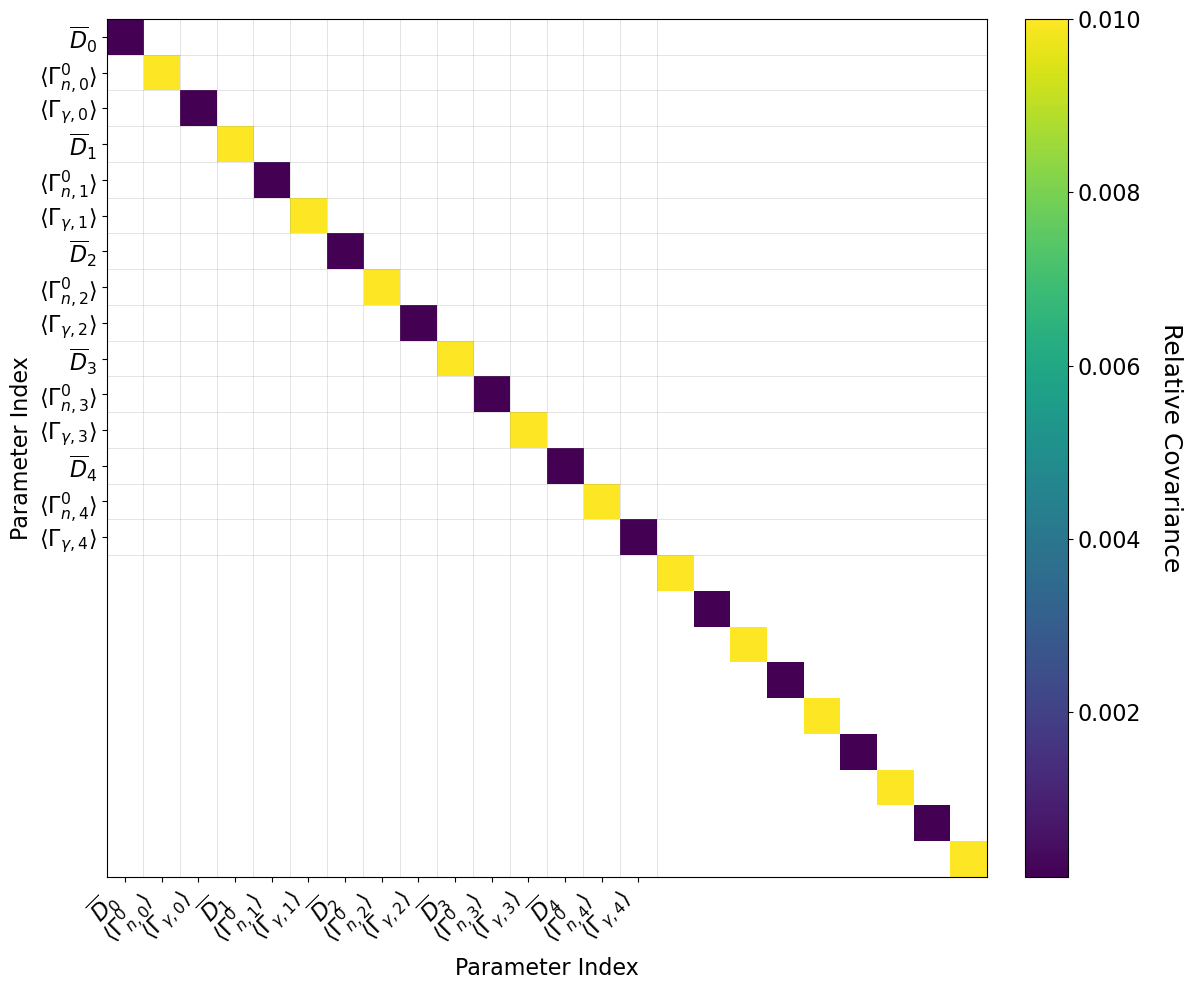

In [6]:
from matplotlib import colors

# Create parameter labels vector for the 24x24 matrix
# You can modify these labels as needed
matsize = 15
myfont = 16
param_labels = []
for i in range(5):  # Assuming 24 parameters, alternating two-by-two
    param_labels.append(rf"$\overline{{D}}_{{{i}}}$")
    param_labels.append(rf"$\langle \Gamma^0_{{n,{i}}}\rangle$")
    param_labels.append(rf"$\langle \Gamma_{{\gamma,{i}}}\rangle$")

# Plot the relative covariance matrix
fig, ax = plt.subplots(figsize=(12, 10))
# Create a colormap where 0 values are transparent/blank
cmap = plt.cm.viridis.copy()
cmap.set_bad(color='white')
# relative_cov_matrix = relative_cov_matrix / np.outer(np.sqrt(np.diag(relative_cov_matrix)), np.sqrt(np.diag(relative_cov_matrix)))
masked_matrix = np.ma.masked_where(relative_cov_matrix == 0, relative_cov_matrix)
im = ax.imshow(masked_matrix, cmap=cmap, aspect='auto', interpolation='none')

# Add colorbar with myfont
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=myfont)
cbar.set_label('Relative Covariance', rotation=270, labelpad=30, fontsize=18)

# Set labels
ax.set_xlabel('Parameter Index', fontsize=myfont)
ax.set_ylabel('Parameter Index', fontsize=myfont)
# ax.set_title(f'Relative Covariance Matrix ({matsize}x{matsize})')

# Set tick positions and labels
tick_positions = range(0, matsize)
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xticklabels(param_labels, rotation=45, ha='right', fontsize=myfont)
ax.set_yticklabels(param_labels, fontsize=myfont)

# Add grid lines between cells (not on top)
ax.set_xticks(np.arange(-.5, matsize, 1), minor=True)
ax.set_yticks(np.arange(-.5, matsize, 1), minor=True)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
ax.tick_params(which='minor', bottom=False, left=False)

plt.tight_layout()
plt.show()


# Step 3: Expand the RCM
To match energy-dependent nominal values

In [7]:
# Expand the 24x24 reference matrix to 72x72 by duplicating according to energy points
print("Analyzing (L,J) group structure to expand reference matrix...")

# First, let's understand the structure by examining the actual data
energy_counts = []
lj_info = []

for l, orbital in enumerate(urr.parameters.l_values):
    for j, spingparity in enumerate(orbital.j_values):
        n_energies = len(spingparity.energies)
        energy_counts.extend([n_energies, n_energies])  # for spacings and neutron widths
        lj_info.append((l, j, spingparity.spin, n_energies))
        print(f"L={l}, J={spingparity.spin}: {n_energies} energy points")

print(f"\nTotal (L,J) groups: {len(lj_info)}")
print(f"Energy counts per variable: {energy_counts}")
print(f"Total parameters: {sum(energy_counts)}")

# Create the expanded 72x72 reference matrix
total_params = sum(energy_counts)
expanded_ref_matrix = np.zeros((total_params, total_params))

# Create mapping from 24x24 indices to 72x72 ranges
param_ranges = []
current_idx = 0

for group_idx in range(len(lj_info)):
    # For each group, we have spacings and neutron widths
    l, j, spin, n_energies = lj_info[group_idx]
    
    # Spacings range
    spacing_start = current_idx
    spacing_end = current_idx + n_energies
    param_ranges.append(('spacing', group_idx, l, j, spin, spacing_start, spacing_end))
    current_idx += n_energies
    
    # Neutron widths range
    neutron_start = current_idx
    neutron_end = current_idx + n_energies
    param_ranges.append(('neutron', group_idx, l, j, spin, neutron_start, neutron_end))
    current_idx += n_energies

print(f"\nParameter ranges mapping:")
for i, (var_type, group_idx, l, j, spin, start, end) in enumerate(param_ranges):
    print(f"  24x24 idx {i:2d} -> 72x72 range [{start:2d}:{end:2d}] ({var_type}, L={l}, J={spin})")

# Now expand the reference matrix
for i in range(24):
    for j in range(24):
        # Get the ranges for parameters i and j in the 72x72 space
        _, _, _, _, _, start_i, end_i = param_ranges[i]
        _, _, _, _, _, start_j, end_j = param_ranges[j]
        
        # Fill the corresponding block in the 72x72 matrix
        ref_value = relative_cov_matrix[i, j]
        expanded_ref_matrix[start_i:end_i, start_j:end_j] = ref_value

print(f"\nExpanded reference matrix shape: {expanded_ref_matrix.shape}")
print(f"Original reference matrix shape: {relative_cov_matrix.shape}")

# Use the expanded matrix for comparison
expanded_relative_cov_matrix = expanded_ref_matrix

Analyzing (L,J) group structure to expand reference matrix...
L=0, J=4.5: 3 energy points
L=0, J=5.5: 3 energy points
L=1, J=3.5: 3 energy points
L=1, J=4.5: 3 energy points
L=1, J=5.5: 3 energy points
L=1, J=6.5: 3 energy points
L=2, J=2.5: 3 energy points
L=2, J=3.5: 3 energy points
L=2, J=4.5: 3 energy points
L=2, J=5.5: 3 energy points
L=2, J=6.5: 3 energy points
L=2, J=7.5: 3 energy points

Total (L,J) groups: 12
Energy counts per variable: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Total parameters: 72

Parameter ranges mapping:
  24x24 idx  0 -> 72x72 range [ 0: 3] (spacing, L=0, J=4.5)
  24x24 idx  1 -> 72x72 range [ 3: 6] (neutron, L=0, J=4.5)
  24x24 idx  2 -> 72x72 range [ 6: 9] (spacing, L=0, J=5.5)
  24x24 idx  3 -> 72x72 range [ 9:12] (neutron, L=0, J=5.5)
  24x24 idx  4 -> 72x72 range [12:15] (spacing, L=1, J=3.5)
  24x24 idx  5 -> 72x72 range [15:18] (neutron, L=1, J=3.5)
  24x24 idx  6 -> 72x72 range [18:21] (spacing, L=1, J=4.5)
  24x24 i

In [1]:
import numpy as np
data = np.load('urr_parameters.npz', allow_pickle=True)
parameters = data['parameters']  # Shape: (n_files, 72)
file_names = data['file_names']  # List of file names
param_labels = data['parameter_labels']  # List of parameter names

Comparison between empirical and reference covariance matrices
Loaded parameters shape: (300, 72)
Number of samples: 300
Number of parameters: 72
Empirical covariance matrix shape: (72, 72)
Reference covariance matrix shape: (24, 24)

Using expanded reference matrix from Cell 5: (72, 72)
Both matrices are now 72x72 for proper comparison
Comparing matrices of size: (72, 72)

Diagonal comparison (relative uncertainties):
Index Reference    Empirical    Difference   Rel. Diff (%)  
-----------------------------------------------------------------
0     0.000100     0.000097     -0.000003    -2.75          
1     0.000100     0.000098     -0.000002    -1.65          
2     0.000100     0.000097     -0.000003    -3.44          
3     0.010000     0.009866     -0.000134    -1.34          
4     0.010000     0.009737     -0.000263    -2.63          
5     0.010000     0.009784     -0.000216    -2.16          
6     0.000100     0.000098     -0.000002    -2.12          
7     0.000100     0.00

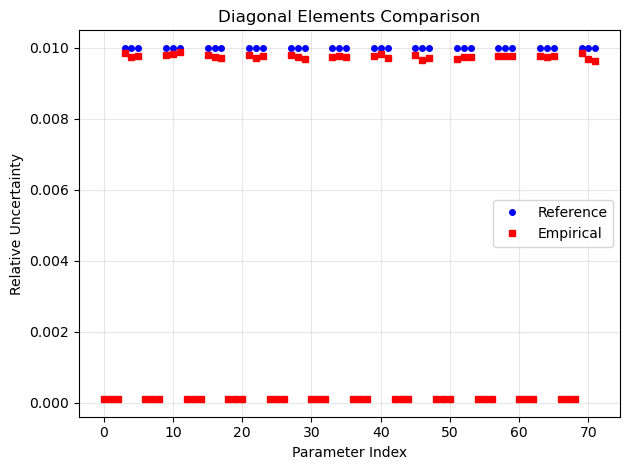

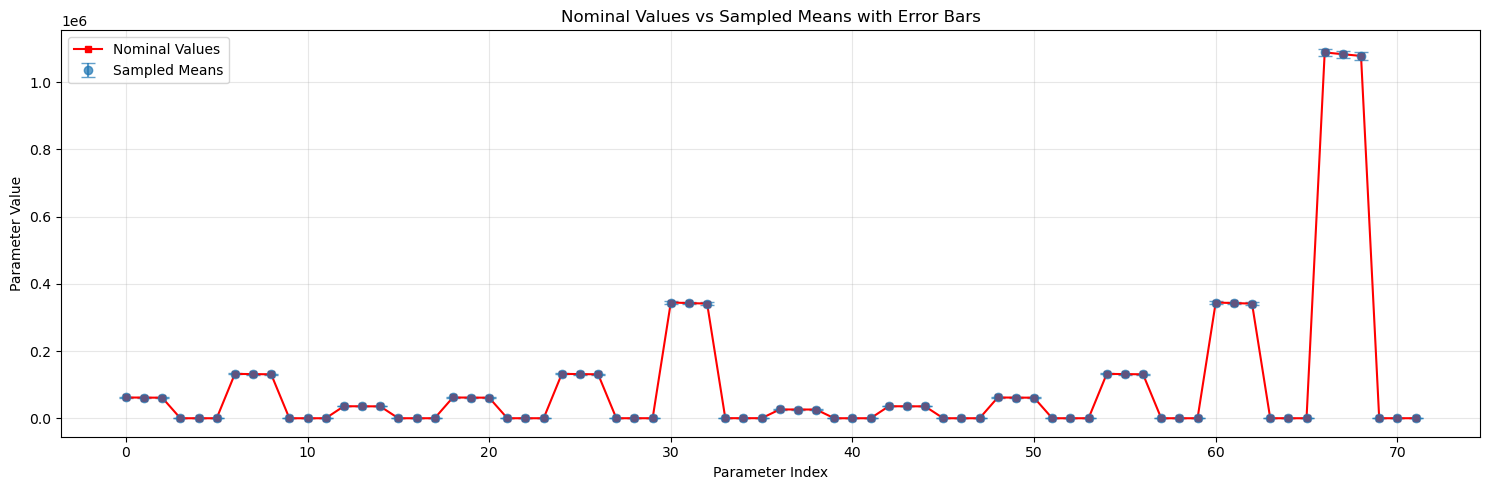


Comparison completed!


In [12]:
# Compare empirical covariance matrix from NPZ file with reference matrix
print("Comparison between empirical and reference covariance matrices")
print("=" * 60)

# Compute empirical covariance matrix from the loaded parameters
print(f"Loaded parameters shape: {parameters.shape}")
print(f"Number of samples: {parameters.shape[0]}")
print(f"Number of parameters: {parameters.shape[1]}")

# Compute relative deviations for empirical covariance
param_means = np.mean(parameters, axis=0)
relative_deviations = np.zeros_like(parameters)

for i in range(parameters.shape[1]):
    if param_means[i] != 0:
        relative_deviations[:, i] = (parameters[:, i] - param_means[i]) / param_means[i]
    else:
        relative_deviations[:, i] = parameters[:, i] - param_means[i]

# Compute empirical relative covariance matrix
empirical_cov_matrix = np.cov(relative_deviations, rowvar=False)
print(f"Empirical covariance matrix shape: {empirical_cov_matrix.shape}")
print(f"Reference covariance matrix shape: {relative_cov_matrix.shape}")

# Use the expanded reference matrix from Cell 5 for proper 72x72 comparison
if 'expanded_relative_cov_matrix' in globals():
    print(f"\nUsing expanded reference matrix from Cell 5: {expanded_relative_cov_matrix.shape}")
    ref_matrix_for_comparison = expanded_relative_cov_matrix
    emp_matrix_for_comparison = empirical_cov_matrix
    print(f"Both matrices are now 72x72 for proper comparison")
else:
    print(f"\nExpanded matrix not found, using original 24x24 comparison")
    ref_matrix_for_comparison = relative_cov_matrix
    emp_matrix_for_comparison = empirical_cov_matrix[:24, :24]

print(f"Comparing matrices of size: {ref_matrix_for_comparison.shape}")

# Extract diagonal elements (relative uncertainties)
ref_diag = np.diag(ref_matrix_for_comparison)
emp_diag = np.diag(emp_matrix_for_comparison)

print(f"\nDiagonal comparison (relative uncertainties):")
print(f"{'Index':<5} {'Reference':<12} {'Empirical':<12} {'Difference':<12} {'Rel. Diff (%)':<15}")
print("-" * 65)

for i in range(len(ref_diag)):
    diff = emp_diag[i] - ref_diag[i]
    rel_diff = (diff / ref_diag[i] * 100) if ref_diag[i] != 0 else np.inf
    print(f"{i:<5} {ref_diag[i]:<12.6f} {emp_diag[i]:<12.6f} {diff:<12.6f} {rel_diff:<15.2f}")

# Statistical summary
print(f"\nStatistical Summary:")
print(f"Reference diagonal - Mean: {np.mean(ref_diag):.6f}, Std: {np.std(ref_diag):.6f}")
print(f"Empirical diagonal - Mean: {np.mean(emp_diag):.6f}, Std: {np.std(emp_diag):.6f}")
print(f"Absolute differences - Mean: {np.mean(np.abs(emp_diag - ref_diag)):.6f}, Max: {np.max(np.abs(emp_diag - ref_diag)):.6f}")
print(f"Relative differences - Mean: {np.mean(np.abs((emp_diag - ref_diag) / ref_diag * 100)):.2f}%, Max: {np.max(np.abs((emp_diag - ref_diag) / ref_diag * 100)):.2f}%")

# Matrix comparison
difference_matrix = emp_matrix_for_comparison - ref_matrix_for_comparison
print(f"\nFull matrix comparison:")
print(f"Maximum absolute difference: {np.max(np.abs(difference_matrix)):.6f}")
print(f"Mean absolute difference: {np.mean(np.abs(difference_matrix)):.6f}")
print(f"RMS difference: {np.sqrt(np.mean(difference_matrix**2)):.6f}")

# Correlation analysis
correlation_diag = np.corrcoef(ref_diag, emp_diag)[0, 1]
print(f"Correlation coefficient (diagonal elements): {correlation_diag:.4f}")

# Visual comparison of diagonal elements
import matplotlib.pyplot as plt

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot diagonal elements
plt.plot(ref_diag, 'bo', label='Reference', markersize=4)
plt.plot(emp_diag, 'rs', label='Empirical', markersize=4)
plt.xlabel('Parameter Index')
plt.ylabel('Relative Uncertainty')
plt.title('Diagonal Elements Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional plot: Original nominal values and sampled means with error bars
# Get nominal values from sampled_params (flattened to 72 elements)
nominal_values = np.concatenate(sampled_params)  # Shape: (72,)

# Sampled means are already computed as param_means
# Compute standard deviations for error bars
param_stds = np.std(parameters, axis=0)

# Plot
plt.figure(figsize=(15, 5))
plt.errorbar(range(72), param_means, yerr=param_stds, fmt='o', label='Sampled Means', capsize=5, alpha=0.7)
plt.plot(range(72), nominal_values, 's-', label='Nominal Values', markersize=4, color='red')
plt.xlabel('Parameter Index')
plt.ylabel('Parameter Value')
plt.title('Nominal Values vs Sampled Means with Error Bars')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("Comparison completed!")

# Writing a RCM

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt

from ENDFtk.tree import Tape
from ENDFtk.tree import File
from ENDFtk.MF32.MT151 import Section as SectionUncertainty
from ENDFtk.MF32.MT151 import UnresolvedRelativeCovariances
from ENDFtk.MF32.MT151 import UnresolvedCovarianceMatrix
from ENDFtk.MF32.MT151 import UnresolvedLValue
from ENDFtk.MF32.MT151 import ResonanceRange as ResonanceRangeUncertainty

PARAMETER_ORDER = ["D", "GN0", "GG", "GF", "GX"]
PARAM_INDEX = {name: i for i, name in enumerate(PARAMETER_ORDER)}

def build_relative_covariance_values(
    mf2151,
    mpar: int,
    uncertainties_percent: list[float],
    correlate_parameter_names: list[str] | None = None,
    enforce_psd: bool = True,
    psd_tol: float = 1e-12,
):
    """Build the upper-triangular list of a relative covariance matrix with optional full correlations.

    Parameters
    ----------
    mf2151 : parsed MF=2 MT=151 section
        Used only to count orbitals and spin groups.
    mpar : int
        Number of parameters per spin group to include (subset of PARAMETER_ORDER, prefix order).
    uncertainties_percent : list[float] of length mpar
        1-sigma relative uncertainties (percent) for each parameter type in order.
    correlate_parameter_names : list[str], optional
        Names among the included parameter types (e.g. ["GG"]) to be fully correlated across *all* spin groups.
        Fully correlated => correlation coefficient 1.0 between every pair of those parameter instances.
    enforce_psd : bool
        If True, run a nearest-PSD correction (Higham) if numerical negatives appear.
    psd_tol : float
        Tolerance for considering an eigenvalue negative.

    Returns
    -------
    list[float]
        Upper triangular (row-major) of the symmetric relative covariance matrix (NPAR*(NPAR+1)/2 entries).

    Notes
    -----
    - Relative covariance matrix is on relative deviations. A percent uncertainty u% gives variance (u/100)^2.
    - Full correlation among a set with identical variance v sets covariance(i,j)=v, producing a rank-1 block (PSD).
    - If multiple parameter types are requested, each gets its own fully correlated block (still PSD because they are disjoint variable sets).
    """
    if mpar < 1 or mpar > len(PARAMETER_ORDER):
        raise ValueError(f"mpar must be between 1 and {len(PARAMETER_ORDER)} (got {mpar})")
    if len(uncertainties_percent) != mpar:
        raise ValueError(
            f"uncertainties_percent length ({len(uncertainties_percent)}) must equal mpar ({mpar})"
        )

    included_names = PARAMETER_ORDER[:mpar]
    if correlate_parameter_names is None:
        correlate_parameter_names = []
    # Validate correlation names
    for name in correlate_parameter_names:
        if name not in included_names:
            raise ValueError(
                f"Cannot correlate parameter '{name}' not in included set {included_names}"
            )

    # Count total spin groups
    total_spingroups = sum(
        len(orbital.j_values)
        for orbital in mf2151.isotopes[0].resonance_ranges[-1].parameters.l_values
    )
    npar = total_spingroups * mpar

    # Variances (u% -> (u/100)^2)
    variances = np.array([(u / 100.0) ** 2 for u in uncertainties_percent])

    # Build full covariance matrix (start diagonal)
    cov = np.zeros((npar, npar), dtype=float)
    for g in range(total_spingroups):
        start = g * mpar
        cov[start : start + mpar, start : start + mpar] = np.diag(variances)

    # Apply full correlation blocks
    for pname in correlate_parameter_names:
        k = PARAM_INDEX[pname]  # parameter position within group
        if k >= mpar:
            continue  # not included
        # Collect indices of this parameter across all groups
        idxs = [g * mpar + k for g in range(total_spingroups)]
        v = variances[k]
        # Set covariances to v (since std=√v, covariance = √v * √v = v for corr=1)
        for i in idxs:
            for j in idxs:
                cov[i, j] = v

    # Optional PSD enforcement (Higham 2002) if tiny negatives appear
    if enforce_psd:
        # Symmetrize first
        cov = 0.5 * (cov + cov.T)
        eigvals = np.linalg.eigvalsh(cov)
        if np.min(eigvals) < -psd_tol:
            # Higham algorithm
            def nearest_psd(a):
                # Symmetrize
                b = 0.5 * (a + a.T)
                # SVD
                U, s, Vt = np.linalg.svd(b)
                H = Vt.T @ np.diag(s) @ Vt
                a2 = 0.5 * (b + H)
                a3 = 0.5 * (a2 + a2.T)
                # Project eigenvalues to >= 0
                eigvals2, eigvecs2 = np.linalg.eigh(a3)
                eigvals2[eigvals2 < 0] = 0.0
                return eigvecs2 @ np.diag(eigvals2) @ eigvecs2.T
            cov = nearest_psd(cov)

    # Build upper triangular list
    values = []
    for i in range(npar):
        values.extend(cov[i, i:])

    return values


def process_orbitals(mf2151):
    new_lvalues = []

    for l, orbital in enumerate(mf2151.isotopes[0].resonance_ranges[-1].parameters.l_values):
        print(f"Orbital, l={l}")
        spacings = []
        spins = []
        gno = []
        gg = []
        gf = []
        gx = []
        for j, spingparity in enumerate(orbital.j_values):
            spins.append(spingparity.spin)
            spacings.append(spingparity.D[0])
            gno.append(spingparity.GN[0])
            gg.append(spingparity.GG[0])
            gf.append(spingparity.GF[0])
            gx.append(spingparity.GX[0])

        new_lvalues.append(
            UnresolvedLValue(
                awri=orbital.AWRI,
                l=orbital.L,
                d=spacings,
                spins=spins,
                gno=gno,
                gg=gg,
                gf=gf,
                gx=gx,
            )
        )
    return new_lvalues

# Example usage parameters (adjust as needed)
USER_MPAR = 3  # using D, GN0, GG (A,B,C analogy)
USER_UNCERT_PERCENTS = [1, 20.0, 20.0]  # 1% on D, 20% on GN0, 20% on GG
FULLY_CORRELATE = ["GG"]  # fully correlate all C-type variables across spin groups

tape = Tape.from_file('/home/sole-pie01/ndlib/endfb81/n-092_U_238.endf')
mf2151 = tape.materials.front().MF(2).MT(151).parse()

new_file = File(mat=tape.material_numbers[0], mf=32)
tape.materials.front().insert(new_file)
tape.to_file('copy.endf') # useless ?


# Build covariance values dynamically (with full correlation on GG)
cov_values = build_relative_covariance_values(
    mf2151,
    USER_MPAR,
    USER_UNCERT_PERCENTS,
    correlate_parameter_names=FULLY_CORRELATE,
)
print(
    f"Constructed relative covariance matrix with {len(cov_values)} upper-triangular values (full correlation for {FULLY_CORRELATE})."
)
NPAR = int((-1 + np.sqrt(1 + 8 * len(cov_values))) // 2)
relative_cov_matrix_spin = np.zeros((NPAR, NPAR))
triu_indices = np.triu_indices(NPAR)
relative_cov_matrix_spin[triu_indices] = cov_values
relative_cov_matrix_spin = (
    relative_cov_matrix_spin
    + relative_cov_matrix_spin.T
    - np.diag(np.diag(relative_cov_matrix_spin))
)
print("Top-left of covariance matrix with full GG correlation:")
print(relative_cov_matrix_spin[:9, :9])

Constructed relative covariance matrix with 120 upper-triangular values (full correlation for ['GG']).
Top-left of covariance matrix with full GG correlation:
[[0.0001 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.04   0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.04   0.     0.     0.04   0.     0.     0.04  ]
 [0.     0.     0.     0.0001 0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.04   0.     0.     0.     0.    ]
 [0.     0.     0.04   0.     0.     0.04   0.     0.     0.04  ]
 [0.     0.     0.     0.     0.     0.     0.0001 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.04   0.    ]
 [0.     0.     0.04   0.     0.     0.04   0.     0.     0.04  ]]


In [4]:
new_lvalues = process_orbitals(mf2151)

chunk = UnresolvedRelativeCovariances(
            spin = 1.5, ap = 0.51,
            lvalues = new_lvalues,
            matrix = UnresolvedCovarianceMatrix(
                        # mpar = 4,
                        # values = [ 5.,  6.,  7.,  8.,  9., 10., 11., 12.,
                        #                13., 14., 15., 16., 17., 18., 19.,
                        #                     20., 21., 22., 23., 24., 25.,
                        #                          26., 27., 28., 29., 30.,
                        #                               31., 32., 33., 34.,
                        #                                    35., 36., 37.,
                        #                                         38., 39.,
                        #                                              40. ] ) )
                        mpar = USER_MPAR,
                        values = cov_values ) )

new_range = ResonanceRangeUncertainty(
    el = mf2151.isotopes.front().resonance_ranges[-1].EL,
    eh = mf2151.isotopes.front().resonance_ranges[-1].EH,
    naps = mf2151.isotopes.front().resonance_ranges[-1].NAPS,
    scattering_radius = None, # Optional[ENDFtk.MF32.MT151.ScatteringRadiusCovariances]
    parameters = chunk
)

new_32151 = SectionUncertainty(zaid = mf2151.ZA, awr = mf2151.AWR, lfw = mf2151.isotopes.front().LFW, ranges = [new_range])

tape.materials.front().MF(32).insert_or_replace(new_32151)

tape.to_file('n-092_U_238.mf32.endf')

Orbital, l=0
Orbital, l=1
Orbital, l=2


# Script for reading MF2 URR parameters from random files

```python
#!/usr/bin/env python3
"""
URR Parameter Extraction Script

This script extracts URR parameters from multiple sampled ENDF files and saves them
to various formats for further post-processing and analysis.

Usage:
    python extract_urr_parameters.py <random_files_dir> [options]

Example:
    python extract_urr_parameters.py /path/to/random/files/ --output parameters.npz --format npz
"""

import argparse
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import h5py
from ENDFtk.tree import Tape
import json
from datetime import datetime


def extract_parameters_from_file(file_path, debug=False):
    """Extract URR parameters from a single ENDF file."""
    if debug:
        print(f"    Processing {os.path.basename(file_path)}...")
    
    try:
        tape = Tape.from_file(file_path)
        mf2151 = tape.MAT(tape.material_numbers[0]).MF(2).MT(151).parse()
        urr = mf2151.isotopes[0].resonance_ranges[1]
        
        # Extract metadata
        metadata = {
            'file_name': os.path.basename(file_path),
            'material_number': tape.material_numbers[0],
            'resonance_range_index': 1
        }
        
        # Extract parameters and metadata
        file_params = []
        lj_groups = []
        
        for l, orbital in enumerate(urr.parameters.l_values):
            for j, spingparity in enumerate(orbital.j_values):
                try:
                    # Extract group metadata
                    group_info = {
                        'l': l,
                        'j_index': j,
                        'j_value': spingparity.spin,
                        'n_energies': len(spingparity.energies) if hasattr(spingparity.energies, '__len__') else 1
                    }
                    
                    # Extract energies
                    try:
                        energies = list(spingparity.energies)
                        group_info['energies'] = energies
                    except:
                        group_info['energies'] = [0.0]  # Fallback
                    
                    # Extract average level spacings
                    spacings = spingparity.average_level_spacings
                    if hasattr(spacings, '__iter__'):
                        spacing_values = list(spacings)
                    else:
                        spacing_values = [float(spacings)]
                    
                    # Extract average neutron widths
                    neutron_widths = spingparity.average_neutron_widths
                    if hasattr(neutron_widths, '__iter__'):
                        neutron_values = list(neutron_widths)
                    else:
                        neutron_values = [float(neutron_widths)]
                    
                    # Store group info
                    group_info['spacings'] = spacing_values
                    group_info['neutron_widths'] = neutron_values
                    lj_groups.append(group_info)
                    
                    # Add to flat parameter list (same order as validation script)
                    file_params.extend(spacing_values)
                    file_params.extend(neutron_values)
                    
                except Exception as e:
                    if debug:
                        print(f"      Warning: Error extracting L={l}, J={j}: {e}")
                    continue
        
        return file_params, lj_groups, metadata
        
    except Exception as e:
        if debug:
            print(f"      Error processing file: {e}")
        return None, None, None


def extract_all_parameters(random_files_dir, glob_pattern='*.endf', max_files=None, debug=False):
    """Extract parameters from all files in directory."""
    
    # Find all random files
    random_files = sorted([str(p) for p in Path(random_files_dir).glob(glob_pattern)])
    
    if len(random_files) == 0:
        raise ValueError(f"No files found in {random_files_dir} with pattern '{glob_pattern}'")
    
    # Limit number of files if requested
    if max_files and len(random_files) > max_files:
        random_files = random_files[:max_files]
        print(f"Limited to first {max_files} files")
    
    print(f"Processing {len(random_files)} files from {random_files_dir}")
    
    all_params = []
    all_lj_groups = []
    all_metadata = []
    file_names = []
    
    for i, file_path in enumerate(random_files):
        if debug or (i % 50 == 0):
            print(f"  Processing file {i+1}/{len(random_files)}: {os.path.basename(file_path)}")
        
        params, lj_groups, metadata = extract_parameters_from_file(file_path, debug)
        
        if params is not None:
            all_params.append(params)
            all_lj_groups.append(lj_groups)
            all_metadata.append(metadata)
            file_names.append(os.path.basename(file_path))
        elif debug:
            print(f"    Skipped {file_path} due to errors")
    
    if len(all_params) == 0:
        raise ValueError("No valid parameters extracted from any files")
    
    # Check parameter consistency
    param_lengths = [len(params) for params in all_params]
    if len(set(param_lengths)) > 1:
        print(f"Warning: Files have different parameter counts: {set(param_lengths)}")
        from collections import Counter
        most_common_length = Counter(param_lengths).most_common(1)[0][0]
        print(f"Using files with {most_common_length} parameters")
        
        # Filter to consistent length
        filtered_params = []
        filtered_lj_groups = []
        filtered_metadata = []
        filtered_names = []
        
        for i, params in enumerate(all_params):
            if len(params) == most_common_length:
                filtered_params.append(params)
                filtered_lj_groups.append(all_lj_groups[i])
                filtered_metadata.append(all_metadata[i])
                filtered_names.append(file_names[i])
        
        all_params = filtered_params
        all_lj_groups = filtered_lj_groups
        all_metadata = filtered_metadata
        file_names = filtered_names
    
    print(f"Successfully extracted parameters from {len(all_params)} files")
    print(f"Each file contains {len(all_params[0])} parameters")
    
    return np.array(all_params), all_lj_groups, all_metadata, file_names


def save_to_numpy(params_array, lj_groups, metadata, file_names, output_file):
    """Save parameters to numpy .npz format."""
    print(f"Saving to numpy format: {output_file}")
    
    # Create parameter labels
    param_labels = []
    for group in lj_groups[0]:  # Use first file's structure
        l, j_val = group['l'], group['j_value']
        n_energies = len(group['spacings'])
        
        for i in range(n_energies):
            param_labels.append(f"L{l}_J{j_val}_spacing_E{i}")
        for i in range(n_energies):
            param_labels.append(f"L{l}_J{j_val}_neutron_E{i}")
    
    np.savez_compressed(output_file,
                       parameters=params_array,
                       file_names=file_names,
                       parameter_labels=param_labels,
                       metadata=metadata,
                       lj_groups=lj_groups[0],  # Structure info from first file
                       extraction_time=str(datetime.now()))


def save_to_hdf5(params_array, lj_groups, metadata, file_names, output_file):
    """Save parameters to HDF5 format."""
    print(f"Saving to HDF5 format: {output_file}")
    
    with h5py.File(output_file, 'w') as f:
        # Main parameter data
        f.create_dataset('parameters', data=params_array, compression='gzip')
        f.create_dataset('file_names', data=[name.encode() for name in file_names])
        
        # Parameter labels
        param_labels = []
        for group in lj_groups[0]:
            l, j_val = group['l'], group['j_value']
            n_energies = len(group['spacings'])
            
            for i in range(n_energies):
                param_labels.append(f"L{l}_J{j_val}_spacing_E{i}")
            for i in range(n_energies):
                param_labels.append(f"L{l}_J{j_val}_neutron_E{i}")
        
        f.create_dataset('parameter_labels', data=[label.encode() for label in param_labels])
        
        # Group structure
        grp_structure = f.create_group('lj_structure')
        for i, group in enumerate(lj_groups[0]):
            group_grp = grp_structure.create_group(f'group_{i}')
            group_grp.attrs['l'] = group['l']
            group_grp.attrs['j_index'] = group['j_index']
            group_grp.attrs['j_value'] = group['j_value']
            group_grp.attrs['n_energies'] = group['n_energies']
            group_grp.create_dataset('energies', data=group['energies'])
        
        # Metadata
        f.attrs['n_files'] = len(file_names)
        f.attrs['n_parameters'] = params_array.shape[1]
        f.attrs['extraction_time'] = str(datetime.now())


def save_to_csv(params_array, lj_groups, metadata, file_names, output_file):
    """Save parameters to CSV format."""
    print(f"Saving to CSV format: {output_file}")
    
    # Create parameter labels
    param_labels = []
    for group in lj_groups[0]:
        l, j_val = group['l'], group['j_value']
        n_energies = len(group['spacings'])
        
        for i in range(n_energies):
            param_labels.append(f"L{l}_J{j_val}_spacing_E{i}")
        for i in range(n_energies):
            param_labels.append(f"L{l}_J{j_val}_neutron_E{i}")
    
    # Create DataFrame
    df = pd.DataFrame(params_array, columns=param_labels)
    df.insert(0, 'file_name', file_names)
    
    # Save to CSV
    df.to_csv(output_file, index=False)


def save_to_json(params_array, lj_groups, metadata, file_names, output_file):
    """Save parameters to JSON format."""
    print(f"Saving to JSON format: {output_file}")
    
    # Convert to serializable format
    data = {
        'extraction_info': {
            'extraction_time': str(datetime.now()),
            'n_files': len(file_names),
            'n_parameters': params_array.shape[1]
        },
        'lj_structure': lj_groups[0],  # Structure from first file
        'data': []
    }
    
    for i, file_name in enumerate(file_names):
        file_data = {
            'file_name': file_name,
            'parameters': params_array[i].tolist(),
            'metadata': metadata[i]
        }
        data['data'].append(file_data)
    
    with open(output_file, 'w') as f:
        json.dump(data, f, indent=2)


def main():
    parser = argparse.ArgumentParser(description='Extract URR parameters from sampled ENDF files')
    parser.add_argument('random_files_dir', help='Directory containing random sampled ENDF files')
    parser.add_argument('--glob-pattern', '-g', default='*.endf', 
                       help='Glob pattern for random files (default: *.endf)')
    parser.add_argument('--output', '-o', default='urr_parameters', 
                       help='Output file base name (default: urr_parameters)')
    parser.add_argument('--format', '-f', choices=['npz', 'hdf5', 'csv', 'json', 'all'], 
                       default='npz', help='Output format (default: npz)')
    parser.add_argument('--max-files', type=int, default=None, 
                       help='Maximum number of files to process')
    parser.add_argument('--debug', action='store_true', help='Enable debug output')
    
    args = parser.parse_args()
    
    # Validate input directory
    if not os.path.exists(args.random_files_dir):
        print(f"Error: Directory {args.random_files_dir} not found")
        sys.exit(1)
    
    try:
        # Extract parameters from all files
        params_array, lj_groups, metadata, file_names = extract_all_parameters(
            args.random_files_dir, args.glob_pattern, args.max_files, args.debug)
        
        # Determine output formats
        formats_to_save = [args.format] if args.format != 'all' else ['npz', 'hdf5', 'csv', 'json']
        
        # Save in requested format(s)
        for fmt in formats_to_save:
            if fmt == 'npz':
                output_file = f"{args.output}.npz"
                save_to_numpy(params_array, lj_groups, metadata, file_names, output_file)
            elif fmt == 'hdf5':
                output_file = f"{args.output}.h5"
                save_to_hdf5(params_array, lj_groups, metadata, file_names, output_file)
            elif fmt == 'csv':
                output_file = f"{args.output}.csv"
                save_to_csv(params_array, lj_groups, metadata, file_names, output_file)
            elif fmt == 'json':
                output_file = f"{args.output}.json"
                save_to_json(params_array, lj_groups, metadata, file_names, output_file)
        
        print(f"\nExtraction completed successfully!")
        print(f"Extracted {params_array.shape[0]} samples with {params_array.shape[1]} parameters each")
        
        # Print summary statistics
        print(f"\nParameter summary:")
        print(f"  Mean parameter values: {np.mean(params_array, axis=0)[:5]}... (first 5)")
        print(f"  Std parameter values:  {np.std(params_array, axis=0)[:5]}... (first 5)")
        print(f"  Parameter range: [{np.min(params_array):.6f}, {np.max(params_array):.6f}]")
        
    except Exception as e:
        print(f"Error during extraction: {e}")
        if args.debug:
            import traceback
            traceback.print_exc()
        sys.exit(1)


if __name__ == "__main__":
    main()
```